In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
cars = pd.read_csv("imports-85.data")

In [74]:
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [39]:
cars.columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [40]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Data Cleaning

In [41]:
# Select only the columns with continuous values from
# https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [42]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [43]:
numeric_cars= numeric_cars.replace("?",np.nan)

Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.

In [44]:
numeric_cars= numeric_cars.astype('float')

In [45]:
numeric_cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [46]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [47]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [48]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [49]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Normalisation

normalise each column within range of 0 and 1 
we will use skikilearn preprocessing function
reference - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [50]:
price_col = numeric_cars['price']

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()

In [52]:
#convert df to float datatype
norm_df = numeric_cars.values.astype(float)
x_scaled = min_max_scaler.fit_transform(norm_df)

In [54]:
numeric_cars_normalized = pd.DataFrame(x_scaled)

In [57]:
numeric_cars_normalized.columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [58]:
numeric_cars_normalized.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,0.282558
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,0.282558
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,0.219254
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,0.306142
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,0.251527


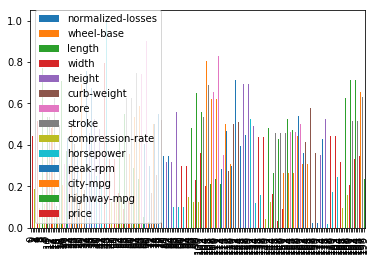

In [61]:
#normalised bar plot
numeric_cars_normalized.plot(kind='bar')

In [62]:
numeric_cars_normalized["price"]= price_col

In [63]:
print (numeric_cars_normalized.head())

   normalized-losses  wheel-base    length     width    height  curb-weight  \
0           0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
1           0.298429    0.230321  0.449254  0.444444  0.383333     0.517843   
2           0.518325    0.384840  0.529851  0.504274  0.541667     0.329325   
3           0.518325    0.373178  0.529851  0.521368  0.541667     0.518231   
4           0.298429    0.384840  0.540299  0.512821  0.441667     0.395268   

       bore    stroke  compression-rate  horsepower  peak-rpm  city-mpg  \
0  0.664286  0.290476           0.12500    0.294393  0.346939  0.222222   
1  0.100000  0.666667           0.12500    0.495327  0.346939  0.166667   
2  0.464286  0.633333           0.18750    0.252336  0.551020  0.305556   
3  0.464286  0.633333           0.06250    0.313084  0.551020  0.138889   
4  0.464286  0.633333           0.09375    0.289720  0.551020  0.166667   

   highway-mpg    price  
0     0.289474  16500.0  
1     0.263158  16500.

# Multivariate Model

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [82]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
#vary the hyperparameter value from 1 to 25 to find the optimal k value
    k_values = [i for i in range(1, 25)]
    #list the rmse values
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

In [83]:
print (k_rmse_results)

{'three best features': {1: 3995.0503864156708, 2: 4217.1659882556196, 3: 3517.7477485206668, 4: 3629.6431546365548, 5: 3334.5678056983638, 6: 3350.791438766536, 7: 3143.2362577510485, 8: 3066.2724408065897, 9: 3201.0534841124027, 10: 3245.7259639254821, 11: 3214.9058782284387, 12: 3393.6901425660535, 13: 3500.8413910298664, 14: 3564.4717888589648, 15: 3571.487545528707, 16: 3637.3652215097177, 17: 3698.6628838411989, 18: 3797.2458336175609, 19: 3894.8877653866293, 20: 3869.1681811792573, 21: 3897.737662331027, 22: 3918.2959814785659, 23: 3970.98416160531, 24: 4030.5696718282652}, 'four best features': {1: 4144.9608369681855, 2: 4218.4674823921541, 3: 3518.0185869005545, 4: 3623.8626739985607, 5: 3334.5678056983638, 6: 3350.8635959008143, 7: 3142.3443287794298, 8: 3065.9762939396646, 9: 3200.9439060423465, 10: 3245.7271670459304, 11: 3214.9328688671421, 12: 3393.0935041107973, 13: 3500.7685191673127, 14: 3564.8761237744493, 15: 3571.3542661946417, 16: 3637.7239910684966, 17: 3698.63506

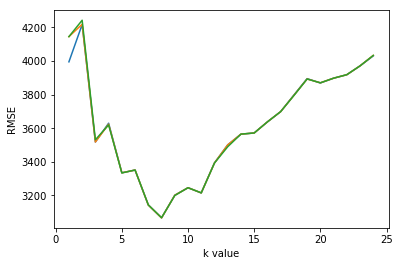

In [84]:
#Display all of the RMSE values.
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [ ]:
So looks like k value around 5-10 will have the lowest rmse- more accuracy